In [ ]:
pip install bayesian-optimization

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
import random

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTC_train.csv")
df['Date'] = pd.to_datetime(df['Date'], format = "mixed", dayfirst = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3439 non-null   datetime64[ns]
 1   Open       3439 non-null   float64       
 2   High       3439 non-null   float64       
 3   Low        3439 non-null   float64       
 4   Close      3439 non-null   float64       
 5   Adj Close  3439 non-null   float64       
 6   Volume     3439 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 188.2 KB


#SMA

In [ ]:
df_sma = df.copy(deep = True)

In [ ]:
def SMA(data, window_size):
    data[f"SMA_{window_size}"] =  data["Close"].rolling(window = window_size).mean()

In [ ]:
def cal_sma(df, short, long):
  df["Signal"] = np.where(df[f"SMA_{short}"] > df[f"SMA_{long}"], 1, 0)
  df["Position"] = df["Signal"].diff()
  df["Buy"] = np.where(df["Position"] == 1, df["Close"], np.nan)
  df["Sell"] = np.where(df["Position"] == -1, df["Close"], np.nan)
  df["Amount"] = 0
  df["Asset"] = 100
  for i in range(1, df.shape[0]):
    if df.loc[i, "Signal"] == 1:
      if df.loc[i, "Position"] == 1:
        df.loc[i, "Amount"] = df.loc[i-1, "Asset"]/df.loc[i, "Close"]
        df.loc[i, "Asset"] = df.loc[i, "Amount"] * df.loc[i, "Close"]
      else:
        df.loc[i, "Amount"] = df.loc[i-1, "Amount"]
        df.loc[i, "Asset"] = df.loc[i, "Amount"]*df.loc[i, "Close"]
    else:
      if df.loc[i, "Position"] == 0:
        df.loc[i, "Amount"] = 0
        df.loc[i, "Asset"] = df.loc[i-1, "Asset"]
      else:
        df.loc[i, "Amount"] = 0
        df.loc[i, "Asset"] = df.loc[i-1, "Amount"]*df.loc[i, "Close"]

In [ ]:
def black_box_function(x, y):
    return profit

In [ ]:
acquisition = ["poi", "ei", "ucb"]
map = {"poi": "XÁC SUẤT CẢI THIỆN", "ei": "KÌ VỌNG CẢI THIỆN", "ucb": "CẬN TRÊN TIN CẬY"}

In [ ]:
for i in acquisition:
  df_sma = df.copy(deep = True)
  short = 69
  long = 169
  SMA(df_sma, short)
  SMA(df_sma, long)
  cal_sma(df_sma, short, long)
  profit = df_sma.loc[2556, "Asset"]
  optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (5, 50), 'y': (100, 200)},
    verbose=2,
    random_state=1,
    allow_duplicate_points=True
  )
  utility = UtilityFunction(kind=i)
  print(map[i])
  for i in range(10):
    next_point = optimizer.suggest(utility)
    next_point = {key : round(next_point[key]) for key in next_point}
    short = next_point["x"]
    long = next_point["y"]
    SMA(df_sma, short)
    SMA(df_sma, long)
    cal_sma(df_sma, short, long)
    profit = df_sma.loc[2556, "Asset"]
    target = black_box_function(**next_point)
    optimizer.register(params=next_point, target=target)
    print(f"Lần lặp thứ {i+1}: {target}, {next_point}")
  print(f"Giá trị tối ưu là: {optimizer.max}")

XÁC SUẤT CẢI THIỆN
Lần lặp thứ 1: 9128.780777120142, {'x': 24, 'y': 172}
Lần lặp thứ 2: 9321.337980480495, {'x': 10, 'y': 137}
Data point [ 10 137] is not unique. 1 duplicates registered. Continuing ...
Lần lặp thứ 3: 9321.337980480495, {'x': 10, 'y': 137}
Data point [ 10 137] is not unique. 2 duplicates registered. Continuing ...
Lần lặp thứ 4: 9321.337980480495, {'x': 10, 'y': 137}
Data point [ 10 137] is not unique. 3 duplicates registered. Continuing ...
Lần lặp thứ 5: 9321.337980480495, {'x': 10, 'y': 137}
Lần lặp thứ 6: 9181.279876241091, {'x': 10, 'y': 136}
Lần lặp thứ 7: 9391.040596146784, {'x': 45, 'y': 145}
Lần lặp thứ 8: 13322.366556839397, {'x': 24, 'y': 135}
Data point [ 24 135] is not unique. 4 duplicates registered. Continuing ...
Lần lặp thứ 9: 13322.366556839397, {'x': 24, 'y': 135}
Data point [ 24 135] is not unique. 5 duplicates registered. Continuing ...
Lần lặp thứ 10: 13322.366556839397, {'x': 24, 'y': 135}
Giá trị tối ưu là: {'target': 13322.366556839397, 'params

In [ ]:
df_sma

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
3434,2024-05-27,68512.179688,70597.882813,68232.500000,69394.554688,69394.554688,25870990717
3435,2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
3436,2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
3437,2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534


#Bollinger Band & RSI



In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTC-USD.csv")
df['Date'] = pd.to_datetime(df['Date'], format = "mixed", dayfirst = True)

In [ ]:
df_bbrsi = df_test.copy(deep = True)

In [ ]:
def BB(data):
  mean = data["Close"].rolling(50).mean()
  std = data["Close"].rolling(50).std()
  data["Lower"] = mean - 2*std
  data["Upper"] = mean + 2*std

In [ ]:
def RSI(data):
  delta = data["Close"].diff()
  gain = delta.where(delta>0, 0 )
  loss = -delta.where(delta<0, 0 )
  avg_gain = gain.rolling(14).mean()
  avg_loss = loss.rolling(14).mean()
  RS = avg_gain/avg_loss
  RSI = 100 - (100 / (1 + RS))
  data["RSI"] = RSI
  data["Oversold"] = 20
  data["Overbought"] = 80

In [ ]:
BB(df_bbrsi)
RSI(df_bbrsi)

In [ ]:
df_bbrsi["Signal"] = np.where((df_bbrsi["Close"] < df_bbrsi["Lower"]) & (df_bbrsi["RSI"] < df_bbrsi["Oversold"]), 1,
                              np.where((df_bbrsi["Close"] > df_bbrsi["Upper"]) & (df_bbrsi["RSI"] > df_bbrsi["Overbought"]), -1, 0))
df_bbrsi["Position"] = 0
df_bbrsi["Amount"] = 0
df_bbrsi["Asset"] = 100

In [ ]:
for i in range(1, df_bbrsi.shape[0]):
  if df_bbrsi.loc[i, "Signal"] == 1:
    if df_bbrsi.loc[i-1, "Position"] == 0:
      df_bbrsi.loc[i, "Position"] = 1
      df_bbrsi.loc[i, "Amount"] = df_bbrsi.loc[i-1, "Asset"]/df_bbrsi.loc[i, "Close"]
      df_bbrsi.loc[i, "Asset"] = df_bbrsi.loc[i, "Amount"]*df_bbrsi.loc[i, "Close"]
    else:
      df_bbrsi.loc[i, "Position"] = 1
      df_bbrsi.loc[i, "Amount"] = df_bbrsi.loc[i-1, "Amount"]
      df_bbrsi.loc[i, "Asset"] = df_bbrsi.loc[i, "Amount"]*df_bbrsi.loc[i, "Close"]
  elif df_bbrsi.loc[i, "Signal"] == -1:
    if df_bbrsi.loc[i-1, "Position"] == 0:
      df_bbrsi.loc[i, "Position"] = 0
      df_bbrsi.loc[i, "Amount"] = 0
      df_bbrsi.loc[i, "Asset"] = df_bbrsi.loc[i-1, "Asset"]
    else:
      df_bbrsi.loc[i, "Position"] = 0
      df_bbrsi.loc[i, "Asset"] = df_bbrsi.loc[i-1, "Amount"]*df_bbrsi.loc[i, "Close"]
      df_bbrsi.loc[i, "Amount"] = 0
  else:
    df_bbrsi.loc[i, "Position"] = df_bbrsi.loc[i-1, "Position"]
    if(df_bbrsi.loc[i, "Position"] == 1):
      df_bbrsi.loc[i, "Amount"] =  df_bbrsi.loc[i-1, "Amount"]
      df_bbrsi.loc[i, "Asset"] = df_bbrsi.loc[i, "Amount"]*df_bbrsi.loc[i, "Close"]
    else:
      df_bbrsi.loc[i, "Amount"] =  0
      df_bbrsi.loc[i, "Asset"] = df_bbrsi.loc[i-1, "Asset"]

#So sanh


In [ ]:
df_smatest = df_test.copy(deep = True)
SMA(df_smatest, 24)
SMA(df_smatest, 135)
cal_sma(df_smatest, 24, 135)

In [ ]:
df_plot = df_test.copy(deep = True)

In [ ]:
df_plot["BBRSI"] = df_bbrsi["Asset"]
df_plot["SMA"] = df_smatest["Asset"]
df_plot["BnH"] = 100/df_plot.loc[0, "Close"]*df_plot["Close"]
df_plot['Date'] = pd.to_datetime(df_plot['Date'], format = "mixed", dayfirst = True)

In [ ]:
df_plot = df_plot.iloc[130:]
df_plot

,Date,Close,BBRSI,SMA,BnH
130,2021-12-09,47672.12109,100.000000,100.000000,119.255152
131,2021-12-10,47243.30469,100.000000,100.000000,118.182437
132,2021-12-11,49362.50781,100.000000,100.000000,123.483772
133,2021-12-12,50098.33594,100.000000,100.000000,125.324498
134,2021-12-13,46737.48047,100.000000,100.000000,116.917083
...,...,...,...,...,...
1030,2024-05-27,69394.55469,168.209266,224.210186,173.595342
1031,2024-05-28,68296.21875,168.209266,220.661520,170.847777
1032,2024-05-29,67578.09375,168.209266,218.341295,169.051337
1033,2024-05-30,68364.99219,168.209266,220.883723,171.019819


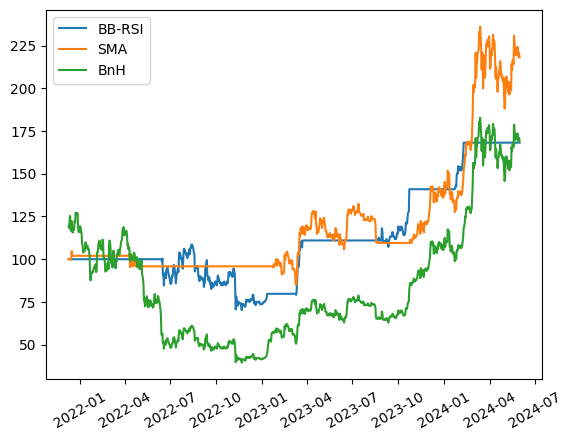

In [ ]:
plt.plot(df_plot.Date, df_plot["BBRSI"], label = "BB-RSI")
plt.plot(df_plot.Date,df_plot["SMA"], label = "SMA")
plt.plot(df_plot.Date,df_plot["BnH"], label = "BnH")
plt.xticks(rotation=30)
plt.legend()
plt.show()